# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
sns.set(style = "white",color_codes = True)

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_transactions = pd.read_csv('../input/final-project-ds/transactions.csv')
df_customer = pd.read_csv('../input/final-project-ds/customer.csv')

In [4]:
df_transaction = pd.read_csv('../input/final-project-ds/transactions.csv')

# Feature Engineering

In [5]:
df_transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


In [6]:
df_transactions['product_metadata'] = df_transactions['product_metadata'].replace({'\[{':'','\}]':'','\'':'','\:':',','\{':'','\},':';'}, regex=True)

In [7]:
df=df_transactions[['product_metadata']]

In [8]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [9]:
df_transactions=explode(df_transactions.assign(product_metadata=df_transactions['product_metadata'].str.split(';')), 'product_metadata')

In [10]:
df_transactions[['id_n','product_id','q_n','quantity','p_n','item_price']] = df_transactions.product_metadata.str.split(",", expand=True)
df_transactions=df_transactions.drop(columns = ['id_n', 'q_n', 'p_n'])
df_transactions.head(20)

,booking_id,created_at,customer_id,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,186e2bee-0637-4710-8981-50c2d737bc42,2018-07-29T15:22:01.458193Z,5868,Debit Card,Success,1415,WEEKENDSERU,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-08-03T05:07:24.812676Z,10000,-8.227893,111.969107,199832,"product_id, 54728, quantity, 1, item_price, 19...",54728,1,191247
1,caadb57b-e808-4f94-9e96-8a7d4c9898db,2018-07-30T12:40:22.365620Z,4774,Credit Card,Success,0,NaN,2ee5ead1-f13e-4759-92df-7ff48475e970,2018-08-03T01:29:03.415705Z,10000,3.013470,107.802514,155526,"product_id, 16193, quantity, 1, item_price, 14...",16193,1,145526
2,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,2018-09-15T11:51:17.365620Z,4774,OVO,Success,0,NaN,93325fb6-eb00-4268-bb0e-6471795a0ad0,2018-09-18T08:41:49.422380Z,10000,-2.579428,115.743885,550696,"product_id, 53686, quantity, 4, item_price, 13...",53686,4,135174
3,f5e530a7-4350-4cd1-a3bc-525b5037bcab,2018-11-01T11:23:48.365620Z,4774,Credit Card,Success,0,NaN,bcad5a61-1b67-448d-8ff4-781d67bc56e4,2018-11-05T17:42:27.954235Z,0,-3.602334,120.363824,271012,"product_id, 20228, quantity, 1, item_price, 27...",20228,1,271012
4,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,2018-12-18T11:20:30.365620Z,4774,Credit Card,Success,0,NaN,df1042ab-13e6-4072-b9d2-64a81974c51a,2018-12-23T17:24:07.361785Z,0,-3.602334,120.363824,198753,"product_id, 55220, quantity, 1, item_price, 19...",55220,1,198753
5,1ed58c46-67fb-4386-924b-983c74ccb4d7,2019-02-03T11:25:55.365620Z,4774,Debit Card,Success,6369,WEEKENDMANTAP,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,2019-02-07T10:41:59.997463Z,5000,-3.602334,120.363824,181865,"product_id, 59620, quantity, 1, item_price, 18...",59620,1,183234
6,c0ced313-e6b1-4a2a-b21f-347eccda5f96,2019-03-22T11:53:02.365620Z,4774,Credit Card,Success,0,NaN,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,2019-03-27T14:40:13.181562Z,10000,-7.712608,110.502877,306599,"product_id, 53136, quantity, 1, item_price, 29...",53136,1,296599
7,0ed6730f-a5db-4e40-9a54-c343474d872c,2019-05-08T11:29:21.365620Z,4774,Credit Card,Success,0,NaN,e7eff973-b499-4b8d-9892-89e67e5fd7d4,2019-05-10T20:09:58.104955Z,10000,3.293114,98.857043,153913,"product_id, 14142, quantity, 1, item_price, 14...",14142,1,143913
8,6edd9366-4788-4bbb-ae5b-744e45e6118d,2019-06-24T12:08:52.365620Z,4774,Credit Card,Success,4019,AZ2022,0d20c278-e082-4f28-9afe-8b5907d7a284,2019-06-28T10:34:36.588498Z,10000,-6.126016,106.779552,370757,"product_id, 12282, quantity, 1, item_price, 36...",12282,1,364776
9,771665e9-7df2-41c8-8168-16d5cdd407a1,2019-08-10T12:14:24.365620Z,4774,Credit Card,Success,9072,WEEKENDSERU,f5352cdc-0e3c-4e77-af42-645501dcded4,2019-08-14T18:07:04.125993Z,10000,-0.992004,114.438739,1295740,"product_id, 53051, quantity, 1, item_price, 29...",53051,1,292052


In [11]:
df = df_customer.merge(df_transactions, on='customer_id', how='left')
df.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_ct = df[['customer_id','first_join_date','created_at']]
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   customer_id      1303880 non-null  int64 
 1   first_join_date  1303880 non-null  object
 2   created_at       1254585 non-null  object
dtypes: int64(1), object(2)
memory usage: 39.8+ MB


In [13]:
df_ct = df_ct.sort_values('created_at').groupby('customer_id').tail(1)

In [14]:
# # One Hot Encoding Kolom payment_method
# df_m = pd.concat([df_m, pd.get_dummies(df_m.payment_method, prefix='payment_method')], axis=1)
# df_m

In [15]:
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,Success,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 18015, quantity, 1, item_price, 30...",18015,1,305982
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,Success,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 2401, quantity, 2, item_price, 26...",2401,2,263311
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31T13:34:59.916342Z,LinkAja,Success,0.0,NaN,82396d8d-7d8a-436d-8e14-75f24aa35faa,2020-09-04T05:49:01.977704Z,10000.0,-6.281795,106.890417,391341.0,"product_id, 12449, quantity, 1, item_price, 38...",12449,1,381341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,6324e721-b59b-4c8b-9570-5ad30112be1e,2021-12-07T17:31:02.139547Z,Credit Card,Failed,0.0,NaN,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,2021-12-12T14:09:32.839861Z,10000.0,-3.992617,131.221877,1200173.0,"product_id, 19124, quantity, 1, item_price, 1...",19124,1,106826
1303876,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,65367fff-1522-4c80-a0f7-1306676bd947,2022-01-23T19:01:48.139547Z,Credit Card,Success,4532.0,WEEKENDSERU,4bb58af9-b2df-4c48-bcb7-d68749625cee,2022-01-26T01:41:11.712735Z,10000.0,-6.286999,106.838482,110483.0,"product_id, 42935, quantity, 1, item_price, 10...",42935,1,105015
1303877,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17

In [16]:
# One Hot Encoding Kolom payment_method
df = pd.concat([df, pd.get_dummies(df.payment_method, prefix='payment_method')], axis=1)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,Success,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 18015, quantity, 1, item_price, 30...",18015,1,305982,0,0,0,1,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,Success,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 2401, quantity, 2, item_price, 26...",2401,2,263311,0,0,0,1,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31T13:34:59.916342Z,LinkAja,Success,0.0,NaN,82396d8d-7d8a-436d-8e14-75f24aa35faa,2020-09-04T05:49:01.977704Z,10000.0,-6.281795,106.890417,391341.0,"product_id, 12449, quantity, 1, item_price, 38...",12449,1,381341,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,6324e721-b59b-4c8b-9570-5ad30112be1e,2021-12-07T17:31:02.139547Z,Credit Card,Failed,0.0,NaN,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,2021-12-12T14:09:32.839861Z,10000.0,-3.992617,131.221877,1200173.0,"product_id, 19124, quantity, 1, item_price, 1...",19124,1,106826,1,0,0,0,0
1303876,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,65367fff-1522-4c80-a0f7-1306676bd947,2022-01-23T19:01:48.139547Z,Credit Card,Success,4532.0,WEEKENDSERU,4bb58af9-b2df-4c48-bcb7-d68749625cee,2022-01-26T01:41:11.712735Z,10000.0,-6.286999,106.838482,110483.0,"product_id, 42935, quantity, 1, item_price, 10...",42935,1,105015,1,0,0,0,0
1303877,40573,Yani,Usada,f

In [17]:
df = pd.concat([df, pd.get_dummies(df.promo_code, prefix='promo_code')], axis=1)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,Success,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 18015, quantity, 1, item_price, 30...",18015,1,305982,0,0,0,1,0,0,0,0,0,0,0,1,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,Success,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 2401, quantity, 2, item_price, 26...",2401,2,263311,0,0,0,1,0,0,0,0,0,0,0,1,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31T13:34:59.916342Z,LinkAja,Success,0.0,NaN,82396d8d-7d8a-436d-8e14-75f24aa35faa,2020-09-04T05:49:01.977704Z,10000.0,-6.281795,106.890417,391341.0,"product_id, 12449, quantity, 1, item_price, 38...",12449,1,381341,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,6324e721-b59b-4c8b-9570-5ad30112be1e,2021-12-07T17:31:02.139547Z,Credit Card,Failed,0.0,NaN,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,2021-12-12T14:09:32.839861Z,10000.0,-3.992617,131.221877,1200173.0,"product_id, 19124, quantity, 1, item_price, 1...",19124,1,106826,1,0,0,0,0,0,0,0,0,0,0,0,0
1303876,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,65367fff-1522-4c80-a0

In [18]:
# Label Encoding Kolom payment_status
payment_status = {'Success': 1, 'Failed': 0}
df['payment_status'] = df['payment_status'].map(payment_status)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,1.0,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 18015, quantity, 1, item_price, 30...",18015,1,305982,0,0,0,1,0,0,0,0,0,0,0,1,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,1.0,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 2401, quantity, 2, item_price, 26...",2401,2,263311,0,0,0,1,0,0,0,0,0,0,0,1,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31T13:34:59.916342Z,LinkAja,1.0,0.0,NaN,82396d8d-7d8a-436d-8e14-75f24aa35faa,2020-09-04T05:49:01.977704Z,10000.0,-6.281795,106.890417,391341.0,"product_id, 12449, quantity, 1, item_price, 38...",12449,1,381341,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,6324e721-b59b-4c8b-9570-5ad30112be1e,2021-12-07T17:31:02.139547Z,Credit Card,0.0,0.0,NaN,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,2021-12-12T14:09:32.839861Z,10000.0,-3.992617,131.221877,1200173.0,"product_id, 19124, quantity, 1, item_price, 1...",19124,1,106826,1,0,0,0,0,0,0,0,0,0,0,0,0
1303876,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,65367fff-1522-4c80-a0f7-1306676bd947

In [19]:
df_PST = df[['customer_id','payment_status']]
df_PST['payment_status'] = df_PST.groupby('customer_id')['payment_status'].transform('mean')
df_PST=df_PST.drop_duplicates('customer_id')
df_PST

,customer_id,payment_status
0,2870,NaN
1,8193,NaN
2,7279,0.889831
120,88813,NaN
121,82542,1.000000
...,...,...
1303613,34743,0.955556
1303658,72065,0.886792
1303711,32818,1.000000
1303868,75597,NaN


In [20]:
df_PA = df[['customer_id','promo_amount']]
df_PA['promo_amount'] = df_PA.groupby('customer_id')['promo_amount'].transform('mean')
df_PA=df_PA.drop_duplicates('customer_id')
df_PA

,customer_id,promo_amount
0,2870,NaN
1,8193,NaN
2,7279,999.457627
120,88813,NaN
121,82542,0.000000
...,...,...
1303613,34743,1878.711111
1303658,72065,1486.433962
1303711,32818,1714.191083
1303868,75597,NaN


In [21]:
df_PMC = df[['customer_id','payment_method_Credit Card']]
df_PMC['payment_method_Credit_Card'] = df_PMC.groupby('customer_id')['payment_method_Credit Card'].transform('sum')
df_PMC=df_PMC.drop_duplicates('customer_id')
df_PMC

,customer_id,payment_method_Credit Card,payment_method_Credit_Card
0,2870,0,0.0
1,8193,0,0.0
2,7279,0,10.0
120,88813,0,0.0
121,82542,0,0.0
...,...,...,...
1303613,34743,1,34.0
1303658,72065,0,3.0
1303711,32818,1,125.0
1303868,75597,0,0.0


In [22]:
# pmdc = payment methods debit card
df_PMDC = df[['customer_id','payment_method_Debit Card']]
df_PMDC['payment_method_Debit_Card'] = df_PMDC.groupby('customer_id')['payment_method_Debit Card'].transform('sum')
df_PMDC=df_PMDC.drop_duplicates('customer_id')
df_PMDC

,customer_id,payment_method_Debit Card,payment_method_Debit_Card
0,2870,0,0.0
1,8193,0,0.0
2,7279,0,8.0
120,88813,0,0.0
121,82542,0,0.0
...,...,...,...
1303613,34743,0,1.0
1303658,72065,0,8.0
1303711,32818,0,2.0
1303868,75597,0,0.0


In [23]:
# payment methods gopay
df_PMG = df[['customer_id','payment_method_Gopay']]
df_PMG['payment_method_Gopay'] = df_PMG.groupby('customer_id')['payment_method_Gopay'].transform('sum')
df_PMG=df_PMG.drop_duplicates('customer_id')
df_PMG

,customer_id,payment_method_Gopay
0,2870,0.0
1,8193,0.0
2,7279,4.0
120,88813,0.0
121,82542,0.0
...,...,...
1303613,34743,2.0
1303658,72065,39.0
1303711,32818,3.0
1303868,75597,0.0


In [24]:
# payment methods linkaja
df_PMLA = df[['customer_id','payment_method_LinkAja']]
df_PMLA['payment_method_LinkAja'] = df_PMLA.groupby('customer_id')['payment_method_LinkAja'].transform('sum')
df_PMLA=df_PMLA.drop_duplicates('customer_id')
df_PMLA

,customer_id,payment_method_LinkAja
0,2870,0.0
1,8193,0.0
2,7279,91.0
120,88813,0.0
121,82542,0.0
...,...,...
1303613,34743,2.0
1303658,72065,1.0
1303711,32818,24.0
1303868,75597,0.0


In [25]:
# payment methods ovo
df_PMO = df[['customer_id','payment_method_OVO']]
df_PMO['payment_method_OVO'] = df_PMO.groupby('customer_id')['payment_method_OVO'].transform('sum')
df_PMO=df_PMO.drop_duplicates('customer_id')
df_PMO

,customer_id,payment_method_OVO
0,2870,0.0
1,8193,0.0
2,7279,5.0
120,88813,0.0
121,82542,1.0
...,...,...
1303613,34743,6.0
1303658,72065,2.0
1303711,32818,3.0
1303868,75597,0.0


In [26]:
df_PCAZ = df[['customer_id','promo_code_AZ2022']]
df_PCAZ['promo_code_AZ2022'] = df_PCAZ.groupby('customer_id')['promo_code_AZ2022'].transform('sum')
df_PCAZ=df_PCAZ.drop_duplicates('customer_id')
df_PCAZ

,customer_id,promo_code_AZ2022
0,2870,0
1,8193,0
2,7279,7
120,88813,0
121,82542,0
...,...,...
1303613,34743,2
1303658,72065,3
1303711,32818,13
1303868,75597,0


In [27]:
df_PCBY = df[['customer_id','promo_code_BUYMORE']]
df_PCBY['promo_code_BUYMORE'] = df_PCBY.groupby('customer_id')['promo_code_BUYMORE'].transform('sum')
df_PCBY=df_PCBY.drop_duplicates('customer_id')
df_PCBY

,customer_id,promo_code_BUYMORE
0,2870,0
1,8193,0
2,7279,2
120,88813,0
121,82542,0
...,...,...
1303613,34743,3
1303658,72065,4
1303711,32818,12
1303868,75597,0


In [28]:
df_PCLD = df[['customer_id','promo_code_LIBURDONG']]
df_PCLD['promo_code_LIBURDONG'] = df_PCLD.groupby('customer_id')['promo_code_LIBURDONG'].transform('sum')
df_PCLD=df_PCLD.drop_duplicates('customer_id')
df_PCLD

,customer_id,promo_code_LIBURDONG
0,2870,0
1,8193,0
2,7279,0
120,88813,0
121,82542,0
...,...,...
1303613,34743,1
1303658,72065,1
1303711,32818,5
1303868,75597,0


In [29]:
df_PCSC = df[['customer_id','promo_code_SC2022']]
df_PCSC['promo_code_SC2022'] = df_PCSC.groupby('customer_id')['promo_code_SC2022'].transform('sum')
df_PCSC=df_PCSC.drop_duplicates('customer_id')
df_PCSC

,customer_id,promo_code_SC2022
0,2870,0
1,8193,0
2,7279,0
120,88813,0
121,82542,0
...,...,...
1303613,34743,1
1303658,72065,0
1303711,32818,1
1303868,75597,0


In [30]:
df_PCST = df[['customer_id','promo_code_STARTUP']]
df_PCST['promo_code_STARTUP'] = df_PCST.groupby('customer_id')['promo_code_STARTUP'].transform('sum')
df_PCST=df_PCST.drop_duplicates('customer_id')
df_PCST

,customer_id,promo_code_STARTUP
0,2870,0
1,8193,0
2,7279,4
120,88813,0
121,82542,0
...,...,...
1303613,34743,1
1303658,72065,1
1303711,32818,1
1303868,75597,0


In [31]:
df_PCWM = df[['customer_id','promo_code_WEEKENDMANTAP']]
df_PCWM['promo_code_WEEKENDMANTAP'] = df_PCWM.groupby('customer_id')['promo_code_WEEKENDMANTAP'].transform('sum')
df_PCWM=df_PCWM.drop_duplicates('customer_id')
df_PCWM 

,customer_id,promo_code_WEEKENDMANTAP
0,2870,0
1,8193,0
2,7279,2
120,88813,0
121,82542,0
...,...,...
1303613,34743,0
1303658,72065,1
1303711,32818,1
1303868,75597,0


In [32]:
df_PCWS = df[['customer_id','promo_code_WEEKENDSERU']]
df_PCWS['promo_code_WEEKENDSERU'] = df_PCWS.groupby('customer_id')['promo_code_WEEKENDSERU'].transform('sum')
df_PCWS=df_PCWS.drop_duplicates('customer_id')
df_PCWS 

,customer_id,promo_code_WEEKENDSERU
0,2870,0
1,8193,0
2,7279,4
120,88813,0
121,82542,0
...,...,...
1303613,34743,2
1303658,72065,2
1303711,32818,17
1303868,75597,0


In [33]:
df_PCXX = df[['customer_id','promo_code_XX2022']]
df_PCXX['promo_code_XX2022'] = df_PCXX.groupby('customer_id')['promo_code_XX2022'].transform('sum')
df_PCXX=df_PCXX.drop_duplicates('customer_id')
df_PCXX 

,customer_id,promo_code_XX2022
0,2870,0
1,8193,0
2,7279,4
120,88813,0
121,82542,0
...,...,...
1303613,34743,2
1303658,72065,2
1303711,32818,5
1303868,75597,0


In [34]:
df_pm = df_PCXX.merge(df_PCWS, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCWM, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCST, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCSC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCLD, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCBY, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCAZ, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMO, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMLA, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMG, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMDC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PA, on='customer_id', how='left')
df_pm = df_pm.merge(df_PST, on='customer_id', how='left')

In [35]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 100000 non-null  int64  
 1   promo_code_XX2022           100000 non-null  uint8  
 2   promo_code_WEEKENDSERU      100000 non-null  uint8  
 3   promo_code_WEEKENDMANTAP    100000 non-null  uint8  
 4   promo_code_STARTUP          100000 non-null  uint8  
 5   promo_code_SC2022           100000 non-null  uint8  
 6   promo_code_LIBURDONG        100000 non-null  uint8  
 7   promo_code_BUYMORE          100000 non-null  uint8  
 8   promo_code_AZ2022           100000 non-null  uint8  
 9   payment_method_OVO          100000 non-null  float64
 10  payment_method_LinkAja      100000 non-null  float64
 11  payment_method_Gopay        100000 non-null  float64
 12  payment_method_Debit Card   100000 non-null  uint8  
 13  payment_method_

In [36]:
df_pm.isnull().sum()

customer_id                       0
promo_code_XX2022                 0
promo_code_WEEKENDSERU            0
promo_code_WEEKENDMANTAP          0
promo_code_STARTUP                0
promo_code_SC2022                 0
promo_code_LIBURDONG              0
promo_code_BUYMORE                0
promo_code_AZ2022                 0
payment_method_OVO                0
payment_method_LinkAja            0
payment_method_Gopay              0
payment_method_Debit Card         0
payment_method_Debit_Card         0
payment_method_Credit Card        0
payment_method_Credit_Card        0
promo_amount                  49295
payment_status                49295
dtype: int64

In [37]:
df_pm

,customer_id,promo_code_XX2022,promo_code_WEEKENDSERU,promo_code_WEEKENDMANTAP,promo_code_STARTUP,promo_code_SC2022,promo_code_LIBURDONG,promo_code_BUYMORE,promo_code_AZ2022,payment_method_OVO,payment_method_LinkAja,payment_method_Gopay,payment_method_Debit Card,payment_method_Debit_Card,payment_method_Credit Card,payment_method_Credit_Card,promo_amount,payment_status
0,2870,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,NaN,NaN
1,8193,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,NaN,NaN
2,7279,4,4,2,4,0,0,2,7,5.0,91.0,4.0,0,8.0,0,10.0,999.457627,0.889831
3,88813,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,NaN,NaN
4,82542,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,0.0,0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,2,2,0,1,1,1,3,2,6.0,2.0,2.0,0,1.0,1,34.0,1878.711111,0.955556
99996,72065,2,2,1,1,0,1,4,3,2.0,1.0,39.0,0,8.0,0,3.0,1486.433962,0.886792
99997,32818,5,17,1,1,1,5,12,13,3.0,24.0,3.0,0,2.0,1,125.0,1714.191083,1.000000
99998,75597,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,NaN,NaN


In [38]:
df_pm.promo_code_XX2022.fillna(0, inplace = True)
df_pm.promo_code_WEEKENDSERU.fillna(0, inplace = True)
df_pm.promo_code_WEEKENDMANTAP.fillna(0, inplace = True)
df_pm.promo_code_STARTUP.fillna(0, inplace = True)
df_pm.promo_code_SC2022.fillna(0, inplace = True)
df_pm.promo_code_LIBURDONG.fillna(0, inplace = True)
df_pm.promo_code_BUYMORE.fillna(0, inplace = True)
df_pm.promo_code_AZ2022.fillna(0, inplace = True)
df_pm.payment_method_OVO.fillna(0, inplace = True)
df_pm.payment_method_LinkAja.fillna(0, inplace = True)
df_pm.payment_method_Gopay.fillna(0, inplace = True)
df_pm.payment_method_Debit_Card.fillna(0, inplace = True)
df_pm.payment_method_Credit_Card.fillna(0, inplace = True)
df_pm.promo_amount.fillna(0, inplace = True)
df_pm.payment_status.fillna(0, inplace = True)

In [39]:
df_pm.payment_status.fillna(0, inplace = True)

In [40]:
df_pm['promo_amount'].fillna(0, inplace = True)

In [41]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 100000 non-null  int64  
 1   promo_code_XX2022           100000 non-null  uint8  
 2   promo_code_WEEKENDSERU      100000 non-null  uint8  
 3   promo_code_WEEKENDMANTAP    100000 non-null  uint8  
 4   promo_code_STARTUP          100000 non-null  uint8  
 5   promo_code_SC2022           100000 non-null  uint8  
 6   promo_code_LIBURDONG        100000 non-null  uint8  
 7   promo_code_BUYMORE          100000 non-null  uint8  
 8   promo_code_AZ2022           100000 non-null  uint8  
 9   payment_method_OVO          100000 non-null  float64
 10  payment_method_LinkAja      100000 non-null  float64
 11  payment_method_Gopay        100000 non-null  float64
 12  payment_method_Debit Card   100000 non-null  uint8  
 13  payment_method_

In [42]:
#yang bagus cuma promo amount sama payment status, jadi yg dipake itu doang
df_pm = df_pm[['customer_id','promo_amount','payment_status']]

In [43]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_id     100000 non-null  int64  
 1   promo_amount    100000 non-null  float64
 2   payment_status  100000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.1 MB


In [44]:
# error

In [45]:
# df_m

In [46]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 957168 to 1303868
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   first_join_date  100000 non-null  object
 2   created_at       50705 non-null   object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [47]:
df_ct['created_at']=df_ct['created_at'].fillna(df_ct['first_join_date'])

In [48]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 957168 to 1303868
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   first_join_date  100000 non-null  object
 2   created_at       100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [49]:
df_ct['first_join_date'] = pd.to_datetime(df_ct['first_join_date'], infer_datetime_format=True, utc = True)

In [50]:
df_ct['created_at']=pd.to_datetime(df_ct['created_at'], format = '%Y-%m-%d ',utc=True)

In [51]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 957168 to 1303868
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   customer_id      100000 non-null  int64              
 1   first_join_date  100000 non-null  datetime64[ns, UTC]
 2   created_at       100000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1)
memory usage: 3.1 MB


In [52]:
#durasi bertahan = jarak first join date ke terakhir beli
df_ct['durasi_bertahan'] = (df_ct['created_at'] - df_ct['first_join_date']).dt.days

In [53]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 957168 to 1303868
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   customer_id      100000 non-null  int64              
 1   first_join_date  100000 non-null  datetime64[ns, UTC]
 2   created_at       100000 non-null  datetime64[ns, UTC]
 3   durasi_bertahan  100000 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(2)
memory usage: 3.8 MB


In [54]:
df_ct=df_ct.drop(columns =['first_join_date','created_at'])

In [55]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 957168 to 1303868
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   customer_id      100000 non-null  int64
 1   durasi_bertahan  100000 non-null  int64
dtypes: int64(2)
memory usage: 2.3 MB


In [56]:
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'], infer_datetime_format=True)
curr_time = pd.to_datetime("now")
df_customer['joins_duration']=(curr_time-df_customer['first_join_date']).dt.days
df_customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,joins_duration
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,1219
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,1954


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 44 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   customer_id                 1303880 non-null  int64  
 1   first_name                  1303880 non-null  object 
 2   last_name                   1303880 non-null  object 
 3   username                    1303880 non-null  object 
 4   email                       1303880 non-null  object 
 5   gender                      1303880 non-null  object 
 6   birthdate                   1303880 non-null  object 
 7   device_type                 1303880 non-null  object 
 8   device_id                   1303880 non-null  object 
 9   device_version              1303880 non-null  object 
 10  home_location_lat           1303880 non-null  float64
 11  home_location_long          1303880 non-null  float64
 12  home_location               1303880 non-null  object 
 1

In [58]:
# recency ->  transactions.created_at
# frequency -> count(transactions.created_at) group by cust_id
# monetary -> sum(transactions.total_amount) group by cust_id
# total_items -> sum(transactions.quantity)
# total_price -> (item_price*quantity)
# total_freight_value -> shipment_fee
# total_order_value -> total_price + shipment_fee

df.frequency.isnull().sum()

In [59]:
df["quantity"] = pd.to_numeric(df["quantity"])

In [60]:
# total_items -> sum(transactions.quantity)
df_ti = df[['customer_id','quantity']]
df_ti['quantity'] = df_ti.groupby('customer_id')['quantity'].transform('sum')
df_ti=df_ti.drop_duplicates('customer_id')
df_ti

,customer_id,quantity
0,2870,0.0
1,8193,0.0
2,7279,204.0
120,88813,0.0
121,82542,1.0
...,...,...
1303613,34743,60.0
1303658,72065,130.0
1303711,32818,232.0
1303868,75597,0.0


In [61]:
df["item_price"] = pd.to_numeric(df["item_price"])
df["quantity"] = pd.to_numeric(df["quantity"])

In [62]:
df_tp = df[['customer_id','item_price']]

In [63]:
df_tp['total_price'] = df_tp.groupby('customer_id')['item_price'].transform('sum')
df_tp = df_tp.drop_duplicates('customer_id')
df_tp=df_tp.drop(columns = ['item_price'])
df_tp

,customer_id,total_price
0,2870,0.0
1,8193,0.0
2,7279,28164041.0
120,88813,0.0
121,82542,115702.0
...,...,...
1303613,34743,12542720.0
1303658,72065,12391947.0
1303711,32818,39116154.0
1303868,75597,0.0


In [64]:
# df_tp

In [65]:
# total_order_value -> total_price + shipment_fee
df_tov = df[['customer_id','total_amount','promo_amount']]
df_tov['total_order_value'] = df_tov['total_amount'] - df_tov['promo_amount']
df_tov['total_order_value'] = df_tov.groupby('customer_id')['total_order_value'].transform('sum')
df_tov=df_tov.drop_duplicates('customer_id')
df_tov=df_tov.drop(columns = ['total_amount','promo_amount'])
df_tov

,customer_id,total_order_value
0,2870,0.0
1,8193,0.0
2,7279,98543844.0
120,88813,0.0
121,82542,115702.0
...,...,...
1303613,34743,26368494.0
1303658,72065,59005669.0
1303711,32818,296410508.0
1303868,75597,0.0


In [66]:
df_fv = df[['customer_id','shipment_fee']]
df_fv['shipment_fee'] = df_fv.groupby('customer_id')['shipment_fee'].transform('sum')
df_fv=df_fv.drop_duplicates('customer_id')
df_fv

,customer_id,shipment_fee
0,2870,0.0
1,8193,0.0
2,7279,1045000.0
120,88813,0.0
121,82542,0.0
...,...,...
1303613,34743,400000.0
1303658,72065,475000.0
1303711,32818,1485000.0
1303868,75597,0.0


In [67]:
df_frequency=df_transactions[['customer_id','created_at']]
df_frequency['created_at']=  pd.to_datetime(df_frequency['created_at'],infer_datetime_format=True )
df_frequency['freq'] = 2**(-0.05*((df_frequency['created_at'].max() - df_frequency['created_at']).dt.days))
df_frequency['freq'] = df_frequency.groupby('customer_id')['freq'].transform('sum')
df_frequency=df_frequency.drop_duplicates('customer_id')
df_frequency=df_frequency.drop(columns=['created_at'])
df_frequency1=df_customer['customer_id']
df_frequency=df_frequency.merge(df_frequency1, on = 'customer_id', how = 'right')
df_frequency.fillna(0, inplace=True)
df_frequency

,customer_id,freq
0,2870,0.000000e+00
1,8193,0.000000e+00
2,7279,5.772251e+00
3,88813,0.000000e+00
4,82542,8.142234e-08
...,...,...
99995,34743,1.889697e+00
99996,72065,4.450680e-01
99997,32818,2.469598e+00
99998,75597,0.000000e+00


In [68]:
#monetary -> total spending user
df_monetary=df_transaction[['customer_id','total_amount']]
df_monetary['monetary'] = df_monetary.groupby('customer_id')['total_amount'].transform('sum')
df_monetary=df_monetary.drop_duplicates('customer_id')
df_monetary=df_monetary.drop(columns = ['total_amount'])
df_monetary1=df_customer['customer_id']
df_monetary=df_monetary.merge(df_monetary1, on = 'customer_id', how = 'right')
df_monetary.fillna(0, inplace = True)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,booking_id,created_at,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,1.0,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 18015, quantity, 1, item_price, 30...",18015,1.0,305982.0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,1.0,2853.0,WEEKENDSERU,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,2020-08-26T05:14:04.908999Z,15000.0,0.621070,111.101844,844751.0,"product_id, 2401, quantity, 2, item_price, 26...",2401,2.0,263311.0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31T13:34:59.916342Z,LinkAja,1.0,0.0,NaN,82396d8d-7d8a-436d-8e14-75f24aa35faa,2020-09-04T05:49:01.977704Z,10000.0,-6.281795,106.890417,391341.0,"product_id, 12449, quantity, 1, item_price, 38...",12449,1.0,381341.0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303875,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,6324e721-b59b-4c8b-9570-5ad30112be1e,2021-12-07T17:31:02.139547Z,Credit Card,0.0,0.0,NaN,f22b54dd-2766-4ac4-9e8e-9fb4572f6b03,2021-12-12T14:09:32.839861Z,10000.0,-3.992617,131.221877,1200173.0,"product_id, 19124, quantity, 1, item_price, 1...",19124,1.0,106826.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1303876,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,65367fff-1522-4c80-a

In [69]:
#recency -> jarak terakhir beli
df_recency = df[['customer_id','created_at']]
df_recency = df_recency.sort_values('created_at').groupby('customer_id').tail(1)
df_recency.reset_index(drop = True, inplace = True)

In [70]:
df_recency

,customer_id,created_at
0,73773,2016-07-01T22:32:45.218400Z
1,30771,2016-07-02T20:01:04.996529Z
2,67563,2016-07-03T16:25:01.401472Z
3,22844,2016-07-04T00:58:13.525069Z
4,9914,2016-07-04T18:10:42.766218Z
...,...,...
99995,56781,NaN
99996,20595,NaN
99997,59948,NaN
99998,64260,NaN


In [71]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  100000 non-null  int64 
 1   created_at   50705 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [72]:
df_recency[df_recency['customer_id']==56781]

,customer_id,created_at
99995,56781,NaN


In [73]:
df_recency['created_at'] = pd.to_datetime(df_recency['created_at'], infer_datetime_format=True)

In [74]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  100000 non-null  int64         
 1   created_at   50705 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 MB


In [75]:
df_recency['created_at'].max()-df_recency[df_recency['customer_id']==56781]['created_at']

99995   NaT
Name: created_at, dtype: timedelta64[ns]

In [76]:
df_recency['recency'] = (df_recency['created_at'].max() - df_recency['created_at']).dt.days
df_recency=df_recency.drop(columns = ['created_at'])
df_recency

,customer_id,recency
0,73773,2221.0
1,30771,2220.0
2,67563,2219.0
3,22844,2218.0
4,9914,2218.0
...,...,...
99995,56781,NaN
99996,20595,NaN
99997,59948,NaN
99998,64260,NaN


In [77]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  100000 non-null  int64  
 1   recency      50705 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [78]:
df_recency.recency.fillna(2222, inplace = True)

In [79]:
df_recency.describe()

,customer_id,recency
count,100000.000000,100000.000000
mean,50000.500000,1246.985020
std,28867.657797,1010.295872
min,1.000000,0.000000
25%,25000.750000,106.000000
50%,50000.500000,1920.000000
75%,75000.250000,2222.000000
max,100000.000000,2222.000000


In [80]:
df_recency.isnull().sum()

customer_id    0
recency        0
dtype: int64

In [81]:
df_m = df_ti.merge(df_tp, on='customer_id', how='left')
df_m = df_m.merge(df_tov, on='customer_id', how='left')
df_m = df_m.merge(df_frequency, on='customer_id', how='left')
df_m = df_m.merge(df_monetary, on='customer_id', how='left')
df_m = df_m.merge(df_recency, on='customer_id', how='left')
df_m = df_m.merge(df_ct, on='customer_id', how='left')

In [82]:
# error

In [83]:
df_m

,customer_id,quantity,total_price,total_order_value,freq,monetary,recency,durasi_bertahan
0,2870,0.0,0.0,0.0,0.000000e+00,0.0,2222.0,0
1,8193,0.0,0.0,0.0,0.000000e+00,0.0,2222.0,0
2,7279,204.0,28164041.0,98543844.0,5.772251e+00,48693665.0,2.0,705
3,88813,0.0,0.0,0.0,0.000000e+00,0.0,2222.0,0
4,82542,1.0,115702.0,115702.0,8.142234e-08,115702.0,471.0,5
...,...,...,...,...,...,...,...,...
99995,34743,60.0,12542720.0,26368494.0,1.889697e+00,16208689.0,4.0,648
99996,72065,130.0,12391947.0,59005669.0,4.450680e-01,31323201.0,32.0,1677
99997,32818,232.0,39116154.0,296410508.0,2.469598e+00,57467588.0,2.0,1427
99998,75597,0.0,0.0,0.0,0.000000e+00,0.0,2222.0,0


In [84]:
# df_m

In [85]:
df_ct

,customer_id,durasi_bertahan
957168,73773,1
816651,30771,0
643769,67563,0
892208,22844,2
343874,9914,0
...,...,...
1303091,56781,0
1303133,20595,0
1303486,59948,0
1303601,64260,0


In [86]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        100000 non-null  int64  
 1   quantity           100000 non-null  float64
 2   total_price        100000 non-null  float64
 3   total_order_value  100000 non-null  float64
 4   freq               100000 non-null  float64
 5   monetary           100000 non-null  float64
 6   recency            100000 non-null  float64
 7   durasi_bertahan    100000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.9 MB


In [87]:
# error

In [88]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        100000 non-null  int64  
 1   quantity           100000 non-null  float64
 2   total_price        100000 non-null  float64
 3   total_order_value  100000 non-null  float64
 4   freq               100000 non-null  float64
 5   monetary           100000 non-null  float64
 6   recency            100000 non-null  float64
 7   durasi_bertahan    100000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.9 MB


In [89]:
# df_m=df_m.drop(columns = ['customer_id'])

In [90]:
df_m=df_m.reset_index()

In [91]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              100000 non-null  int64  
 1   customer_id        100000 non-null  int64  
 2   quantity           100000 non-null  float64
 3   total_price        100000 non-null  float64
 4   total_order_value  100000 non-null  float64
 5   freq               100000 non-null  float64
 6   monetary           100000 non-null  float64
 7   recency            100000 non-null  float64
 8   durasi_bertahan    100000 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 6.9 MB


In [92]:
df_m['freq']=df_m['freq']*2**(-0.05*df_m['recency'])

In [93]:
def is_churn(x):
    if x > 30:
        return True
    else: 
        return False

In [94]:
df_m['is_churn'] = df_m['recency'].apply(lambda x : is_churn(x))

In [95]:
df_m["is_churn"] = df_m["is_churn"].astype(int)

In [96]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              100000 non-null  int64  
 1   customer_id        100000 non-null  int64  
 2   quantity           100000 non-null  float64
 3   total_price        100000 non-null  float64
 4   total_order_value  100000 non-null  float64
 5   freq               100000 non-null  float64
 6   monetary           100000 non-null  float64
 7   recency            100000 non-null  float64
 8   durasi_bertahan    100000 non-null  int64  
 9   is_churn           100000 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 7.6 MB


In [97]:
df_m=df_m.drop(columns = ['quantity', 'recency'])

In [98]:
df_final = df_m.merge(df_pm, on='customer_id', how='left')

In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              100000 non-null  int64  
 1   customer_id        100000 non-null  int64  
 2   total_price        100000 non-null  float64
 3   total_order_value  100000 non-null  float64
 4   freq               100000 non-null  float64
 5   monetary           100000 non-null  float64
 6   durasi_bertahan    100000 non-null  int64  
 7   is_churn           100000 non-null  int64  
 8   promo_amount       100000 non-null  float64
 9   payment_status     100000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 8.4 MB


In [100]:
df_final = df_final.merge(df_fv, on='customer_id', how='left')

In [101]:
df_final=df_final.drop(columns = ['customer_id'])

In [102]:
df_final=df_final.drop(columns = ['index'])

In [103]:
df_final

,total_price,total_order_value,freq,monetary,durasi_bertahan,is_churn,promo_amount,payment_status,shipment_fee
0,0.0,0.0,0.000000e+00,0.0,0,1,0.000000,0.000000,0.0
1,0.0,0.0,0.000000e+00,0.0,0,1,0.000000,0.000000,0.0
2,28164041.0,98543844.0,5.385700e+00,48693665.0,705,0,999.457627,0.889831,1045000.0
3,0.0,0.0,0.000000e+00,0.0,0,1,0.000000,0.000000,0.0
4,115702.0,115702.0,6.629598e-15,115702.0,5,1,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...
99995,12542720.0,26368494.0,1.645077e+00,16208689.0,648,0,1878.711111,0.955556,400000.0
99996,12391947.0,59005669.0,1.468177e-01,31323201.0,1677,1,1486.433962,0.886792,475000.0
99997,39116154.0,296410508.0,2.304216e+00,57467588.0,1427,0,1714.191083,1.000000,1485000.0
99998,0.0,0.0,0.000000e+00,0.0,0,1,0.000000,0.000000,0.0


In [104]:
# error

In [105]:
# df_pm = df_pm.merge(df_PST, on='customer_id', how='left')

# Imbalanced Data, Outlier, and Correlation Matrix

<AxesSubplot:xlabel='is_churn', ylabel='count'>

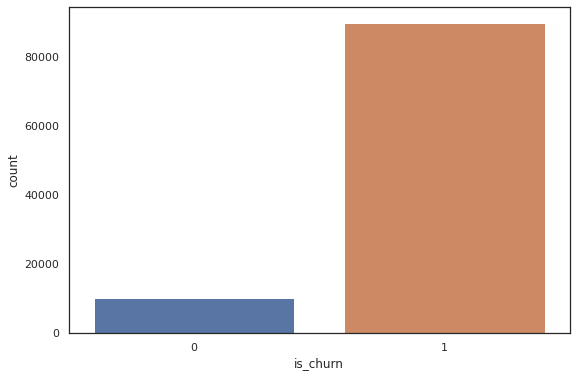

In [106]:
# Imbalance Data

# Observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df_final.is_churn)

#The imbalanced data is solved by using stratified k-fold

<AxesSubplot:>

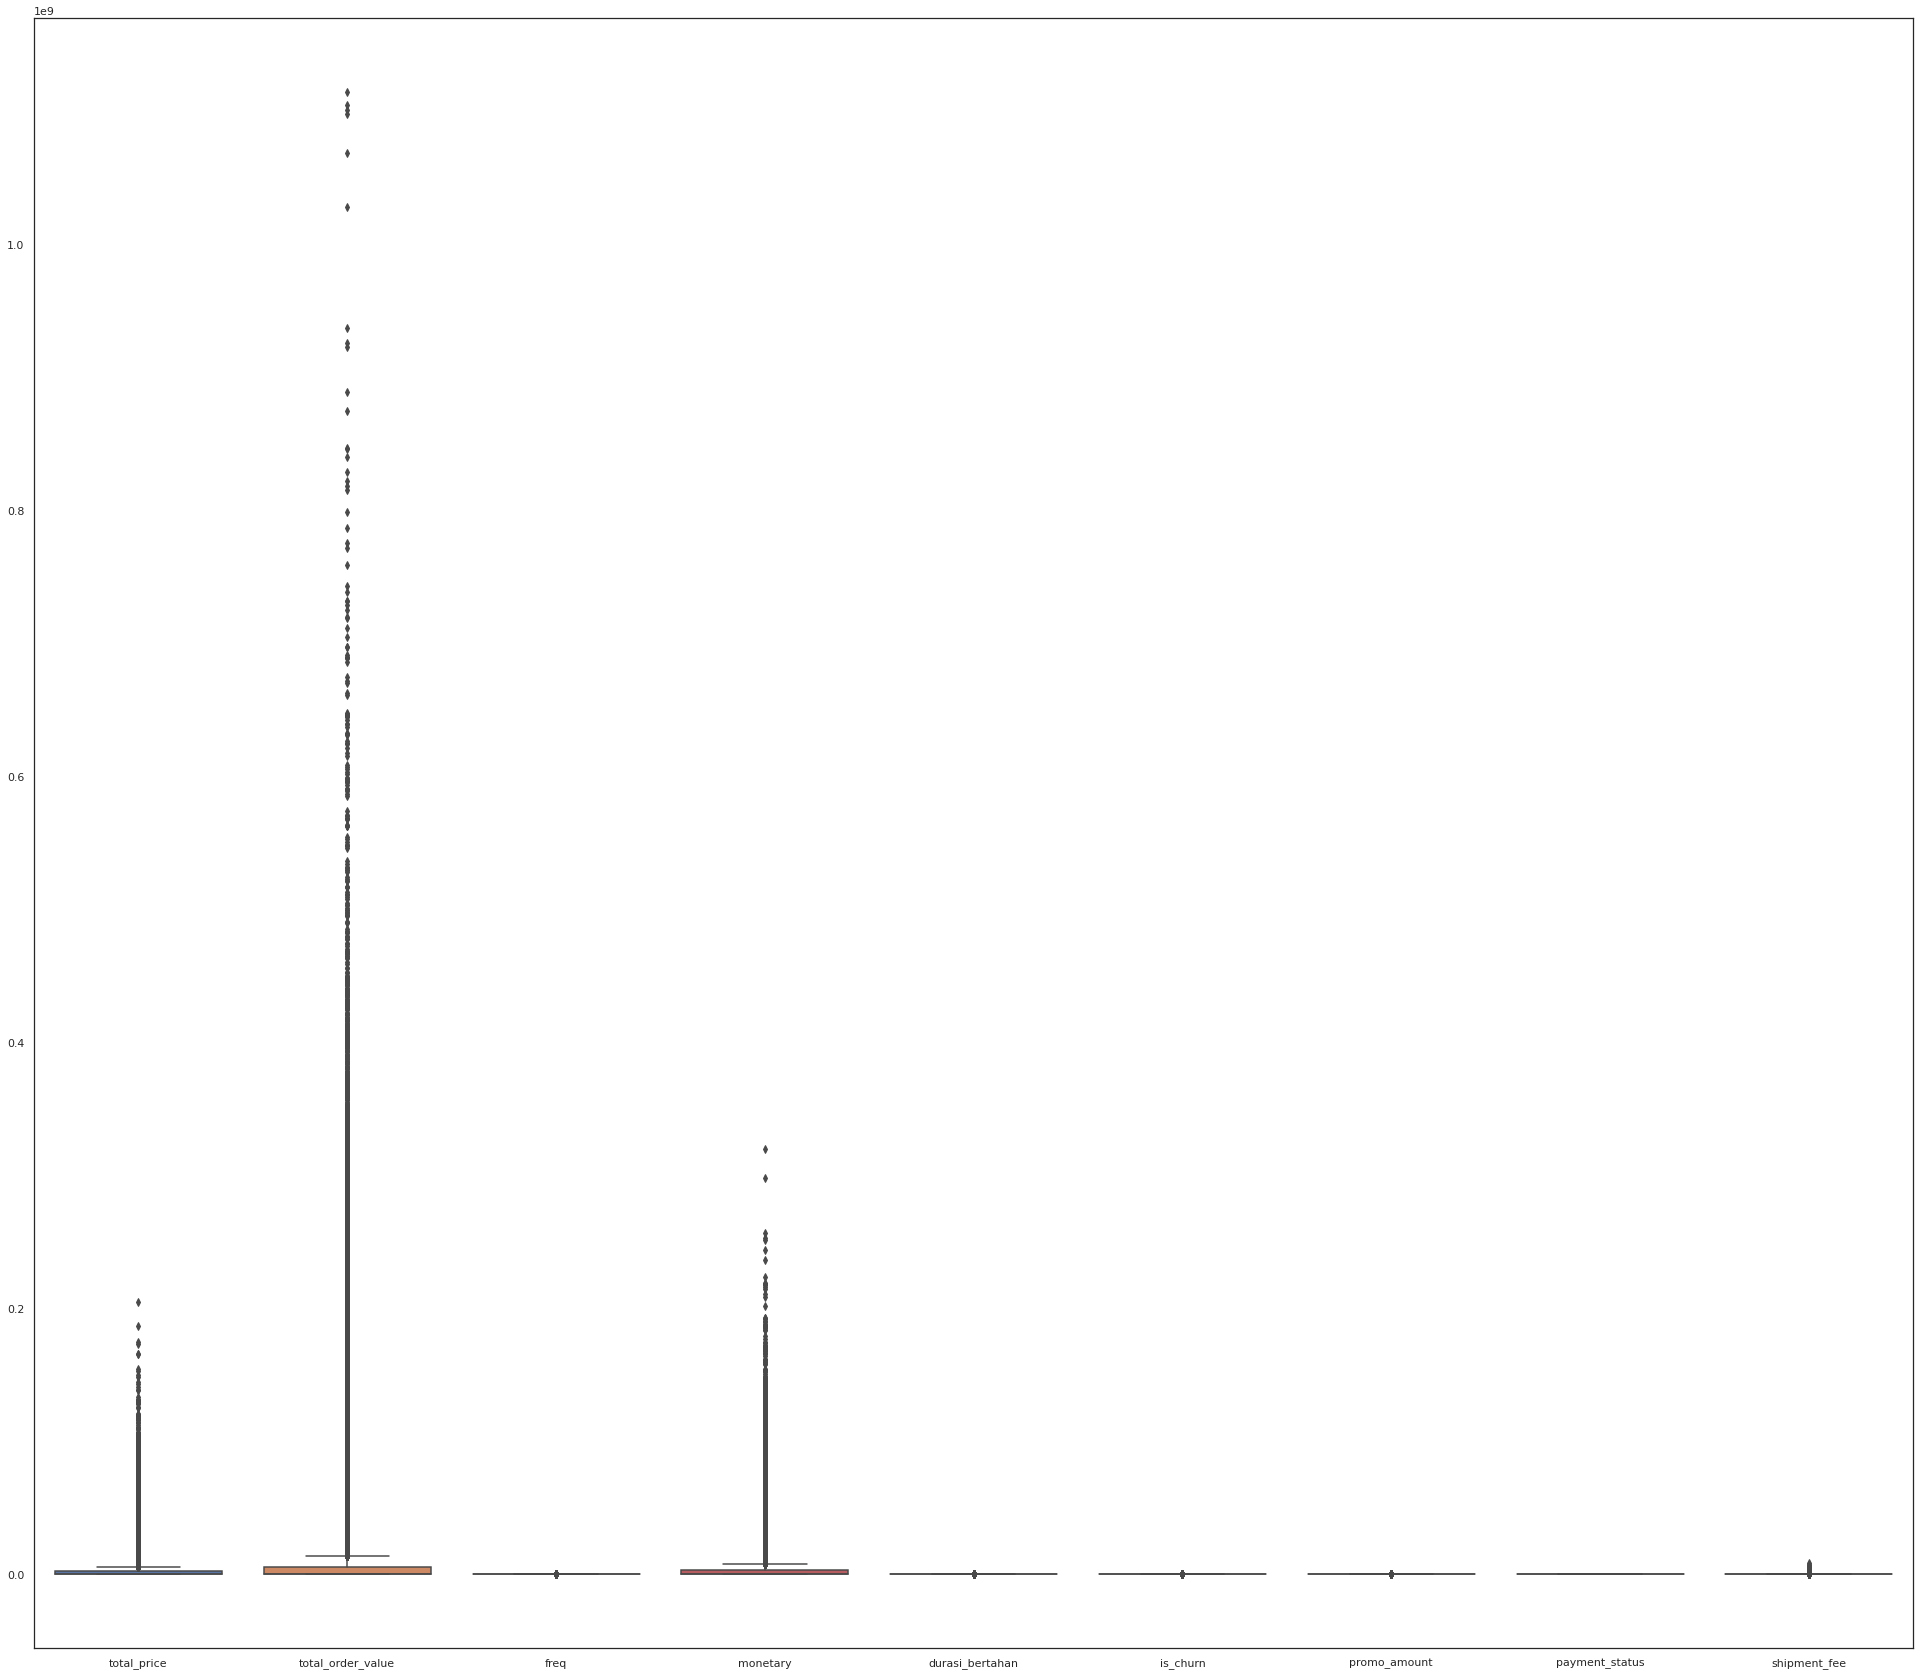

In [107]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_final)

In [108]:
# Z-Score
columns = list(df_final.columns.values)

for i in columns:
    upper_limit = df_final[i].mean() + 3*df_final[i].std()
    lower_limit = df_final[i].mean() - 3*df_final[i].std()

    df_final[i] = np.where(
        df_final[i]>upper_limit,
        upper_limit,
        np.where(
            df_final[i]<lower_limit,
            lower_limit,
            df_final[i]
        )
    )

<AxesSubplot:>

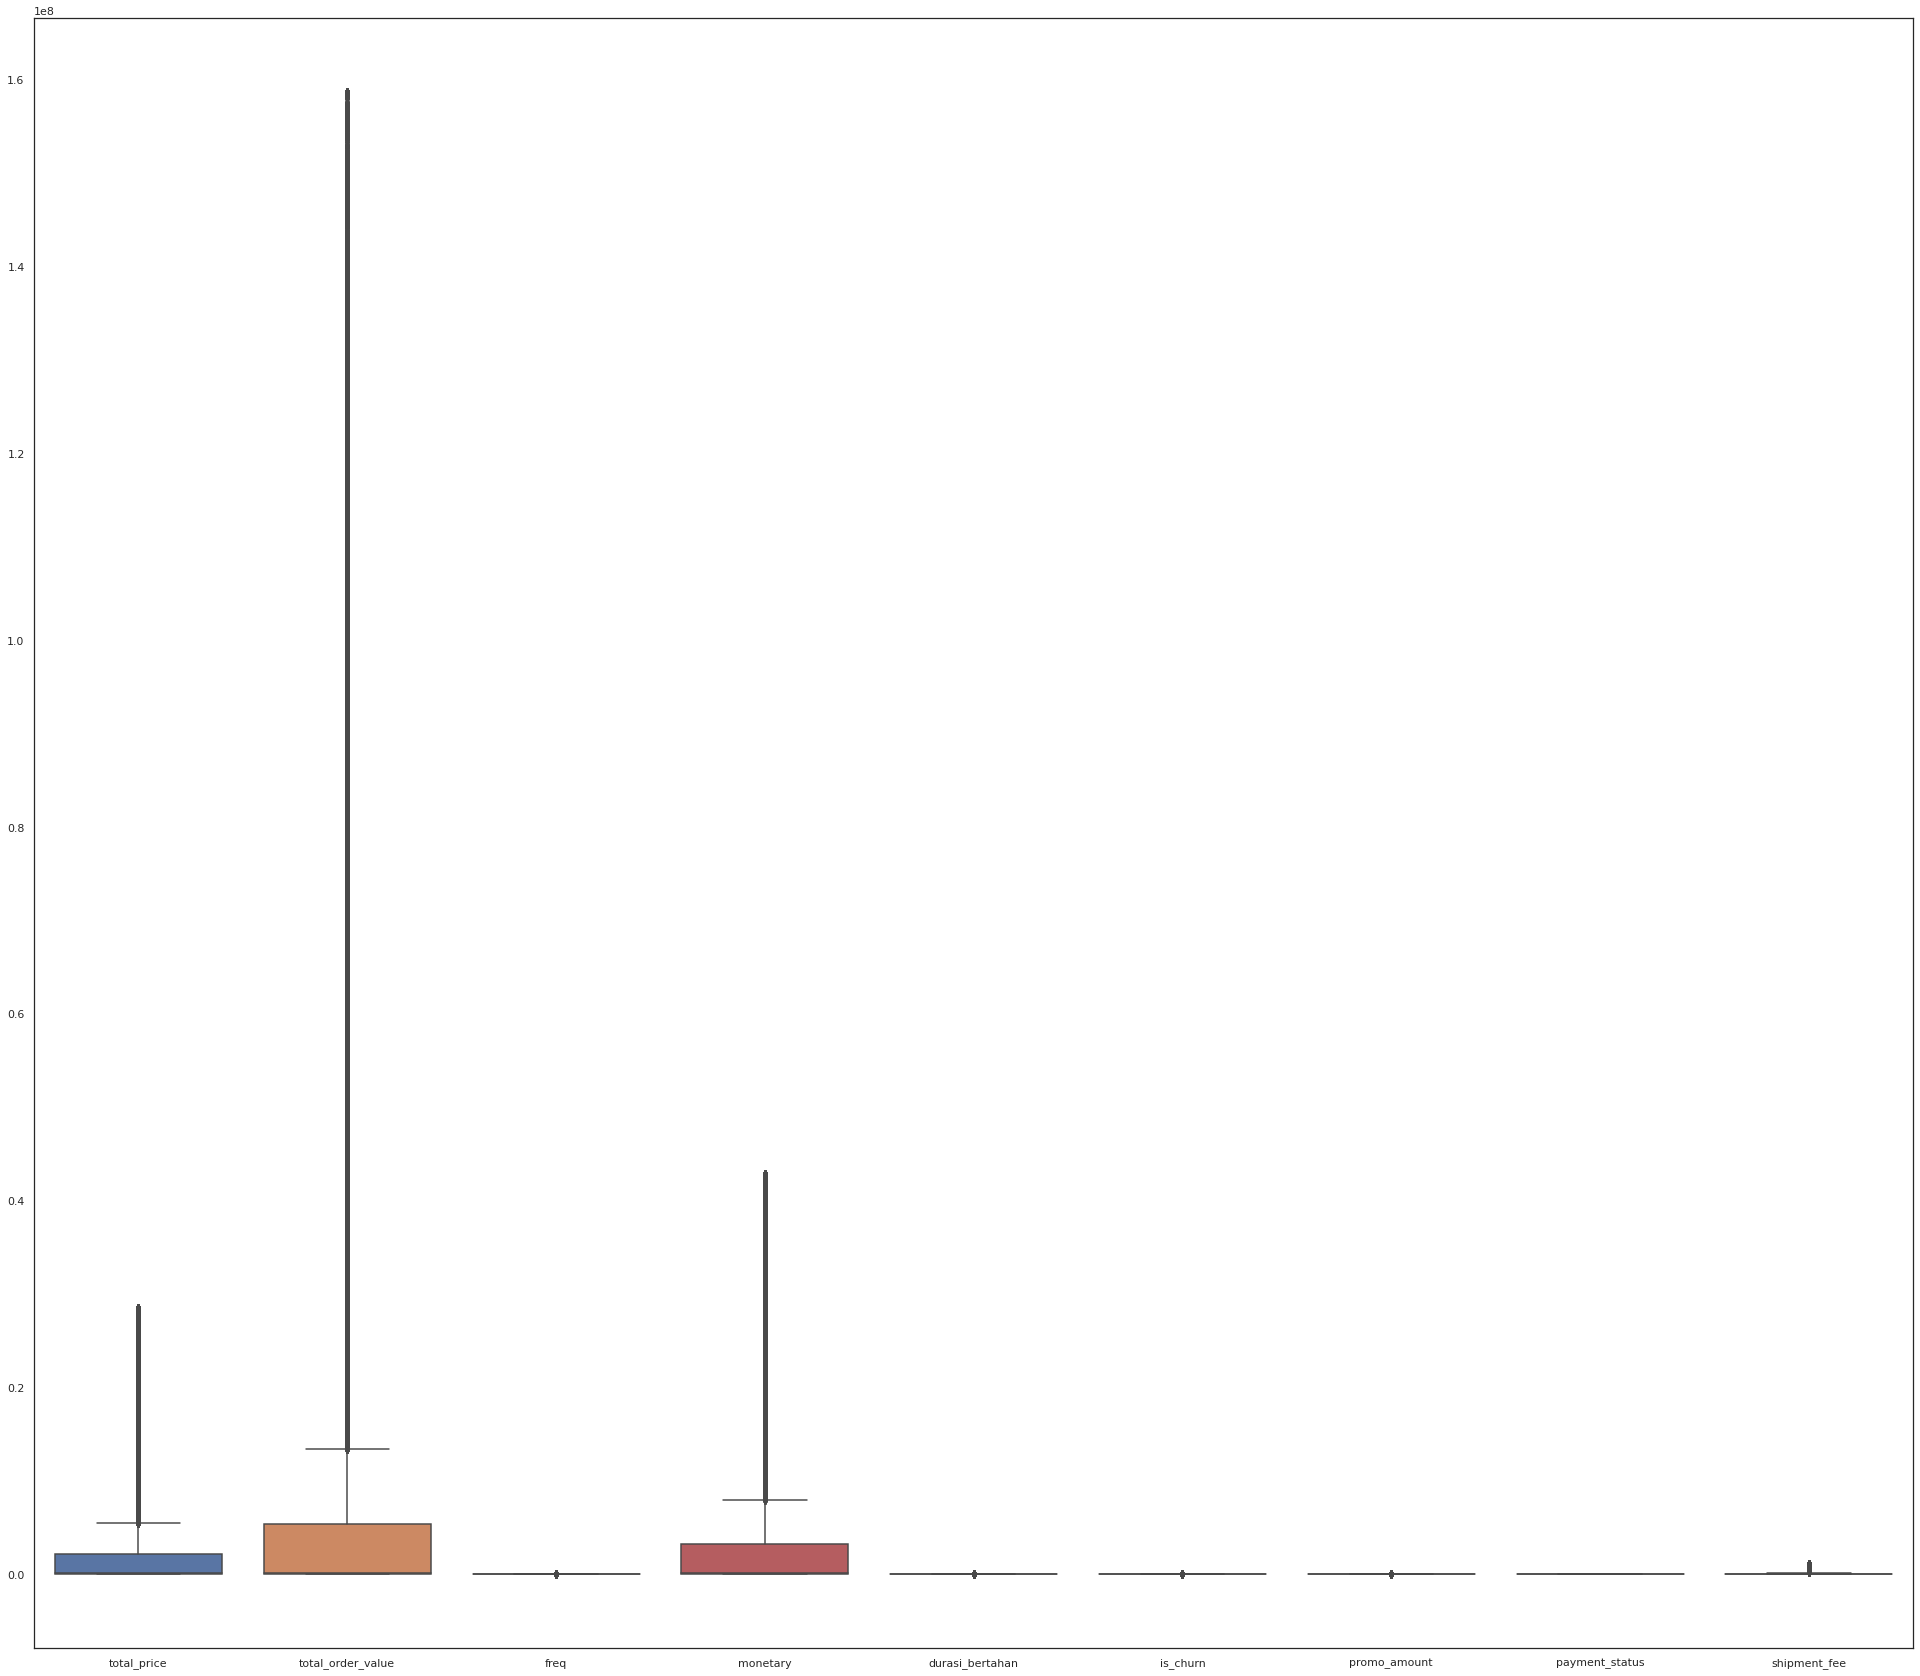

In [109]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_final)

<AxesSubplot:>

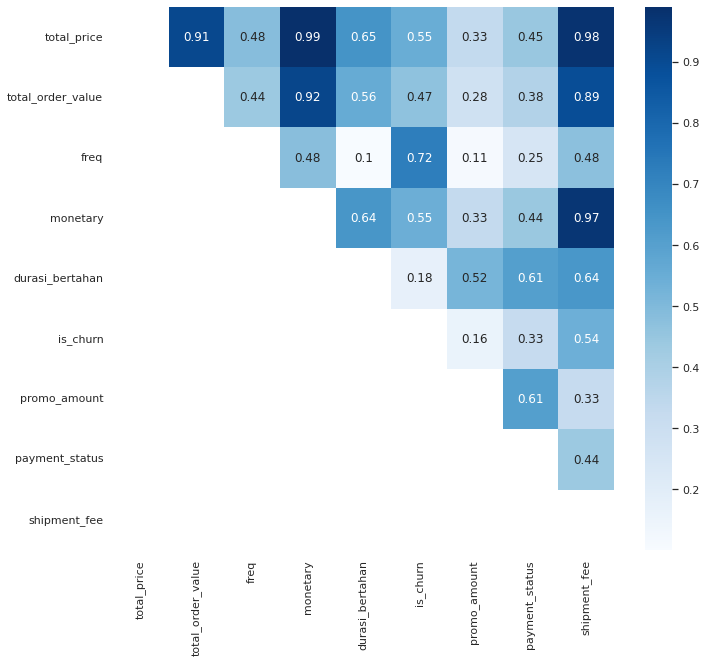

In [110]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

In [111]:
df_final=df_final.drop(columns = ['shipment_fee','total_price','total_order_value'])

<AxesSubplot:>

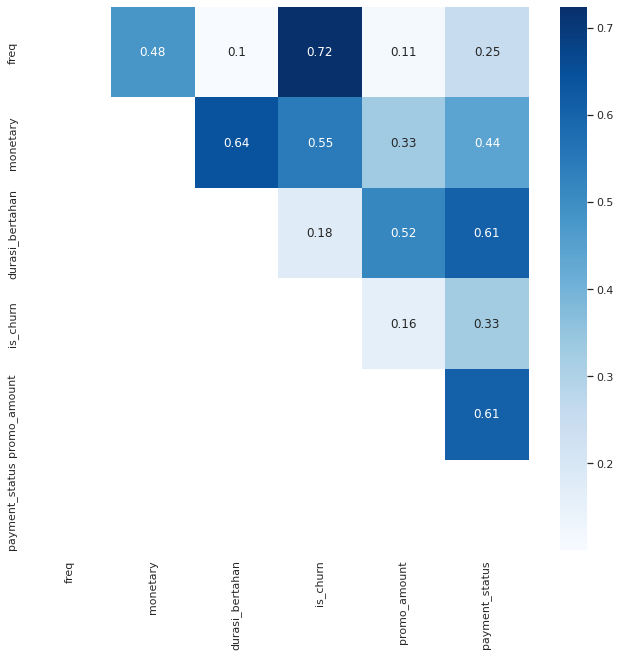

In [112]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

# Modelling

In [113]:
# Memisahkan mana X dan mana y
y= df_final['is_churn']
X= df_final.drop(['is_churn'],1)
X.head()

,freq,monetary,durasi_bertahan,promo_amount,payment_status
0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
1,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
2,4.798833e+00,4.288562e+07,705.0,999.457627,0.889831
3,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
4,6.629598e-15,1.157020e+05,5.0,0.000000,1.000000


In [114]:
y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
99995    0.0
99996    1.0
99997    0.0
99998    1.0
99999    1.0
Name: is_churn, Length: 100000, dtype: float64

In [115]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [116]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

In [117]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [118]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [
            DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
#             SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier
            ]

model_name = [
        'DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
#             'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier'
             ]
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9844], 1 of KFold 5
DecisionTreeClassifier Recall: [0.9920360882156383], 1 of KFold 5
DecisionTreeClassifier Precission: [0.990601712823935], 1 of KFold 5
DecisionTreeClassifier AUC: [0.954677535301557], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9844], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9920360882156383], 2 of KFold 5
DecisionTreeClassifier Precission: [0.990601712823935], 2 of KFold 5
DecisionTreeClassifier AUC: [0.954677535301557], 2 of KFold 

In [119]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
6,GradientBoostingClassifier,0.989320,0.98849,0.996438,0.990721,0.979807,0.000830
5,RandomForestClassifier,1.000000,0.98843,0.996237,0.990855,0.978994,0.011570
8,XGBClassifier,0.996200,0.98820,0.995892,0.990944,0.977522,0.008000
7,ExtraTreesClassifier,1.000000,0.98800,0.995292,0.991323,0.975071,0.012000
0,DecisionTreeClassifier,1.000000,0.98369,0.990791,0.991044,0.955074,0.016310
4,LinearSVC,0.906905,0.90798,0.920425,0.983660,0.613523,0.001075
3,GaussianNB,0.902918,0.90292,0.939108,0.953708,0.705309,0.000002
2,KNeighborsClassifier,0.929293,0.90125,0.930963,0.961293,0.667628,0.028043
1,LogisticRegression,0.865013,0.86443,0.947780,0.898426,0.732153,0.000583


In [120]:
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter Tuning

In [121]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [122]:
#Grid Search RandomForestClassifier


model = RandomForestClassifier()

param = dict()
param['n_estimators']= [100]
param['criterion'] = ['entropy', 'gini']
param['bootstrap'] = [True, False]
param['max_depth'] = [6]
param['max_features'] = ['auto', 'sqrt']

cv = StratifiedKFold(n_splits=5)
clfRF = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfRF.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'], 'max_depth': [6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=4)

In [123]:
print('Best Score: {}'.format(clfRF.best_score_))
print('Best Hyperparameters: {}'.format(clfRF.best_params_))

Best Score: 0.98809
Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [124]:
#Grid Search GradientBoosting


model = GradientBoostingClassifier()

param = dict()
param['loss']= ["deviance"]
param['learning_rate'] = [0.025, 0.075, 0.2]
param['criterion'] = ["friedman_mse"]
param['max_depth'] = [3, 8]
param['n_estimators'] = [10]

cv = StratifiedKFold(n_splits=5)
clfGB = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfGB.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.025, 0.075, 0.2],
                         'loss': ['deviance'], 'max_depth': [3, 8],
                         'n_estimators': [10]},
             scoring='accuracy', verbose=4)

In [125]:
print('Best Score: {}'.format(clfGB.best_score_))
print('Best Hyperparameters: {}'.format(clfGB.best_params_))

Best Score: 0.98795
Best Hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 10}


In [126]:
#Grid Search XGBClassifier


model = XGBClassifier()

param = dict()
param['min_child_weight']= [1, 10]
param['gamma'] = [1, 2]
# param['subsample'] = [0.6, 1.0]
# param['colsample_bytree'] = [0.3, 1.0]
param['max_depth'] = [4, 5]

cv = StratifiedKFold(n_splits=5)
clfXGB = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfXGB.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interacti...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [127]:
print('Best Score: {}'.format(clfXGB.best_score_))
print('Best Hyperparameters: {}'.format(clfXGB.best_params_))

Best Score: 0.9884700000000001
Best Hyperparameters: {'gamma': 2, 'max_depth': 4, 'min_child_weight': 10}


In [128]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [129]:
#Pisahin X, y jadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (80000, 5)
y_train dataset shape:  (80000,)
X_test dataset shape:  (20000, 5)
y_test dataset shape:  (20000,)


In [130]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = XGBClassifier(**clfXGB.best_params_)

In [131]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

In [132]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      8207
         1.0       1.00      0.99      0.99     71793

    accuracy                           0.99     80000
   macro avg       0.96      0.98      0.97     80000
weighted avg       0.99      0.99      0.99     80000



In [133]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2016
         1.0       1.00      0.99      0.99     17984

    accuracy                           0.99     20000
   macro avg       0.95      0.98      0.97     20000
weighted avg       0.99      0.99      0.99     20000



# Feature Importance

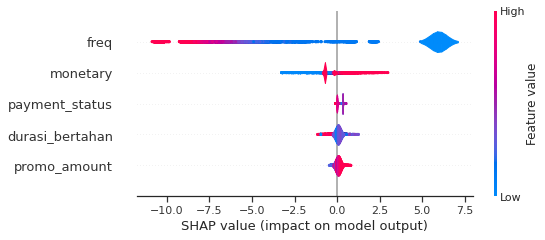

In [134]:
import shap

shap_values = shap.TreeExplainer(model_fit).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="violin")

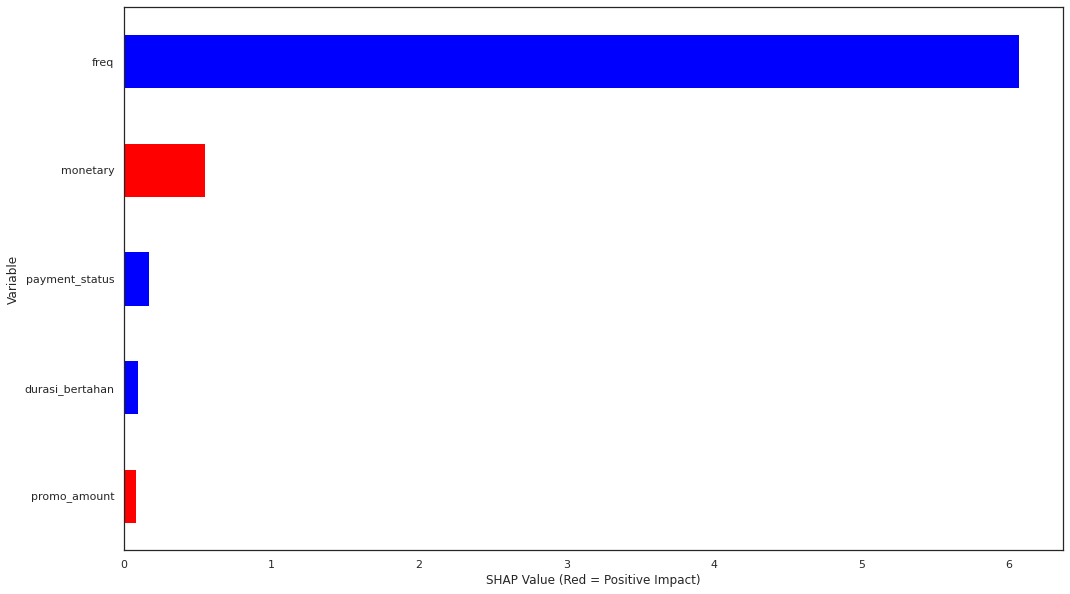

In [135]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',figsize=(15, 10),color = colorlist,legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

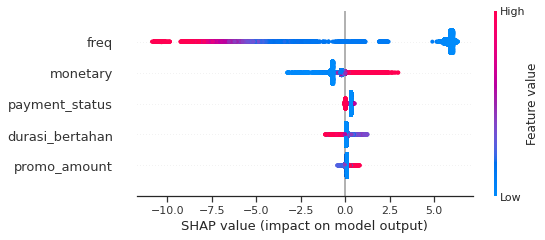

In [136]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

Berdasarkan karakteristik diatas maka
1. Semakin tinggi nilai `freq` semakin rendah churn rate
2. Semakin tinggi nilai `monetary` semakin tinggi churn rate
3. Semakin tinggi nilai `durasi_bertahan` semakin rendah churn rate
4. Semakin tinggi nilai `total_order_value` semakin tinggi churn rate
5. Semakin tinggi nilai `payment_status` semakin rendah churn rate
6. Semakin tinggi nilai `promo_amount` semakin tinggi churn rate

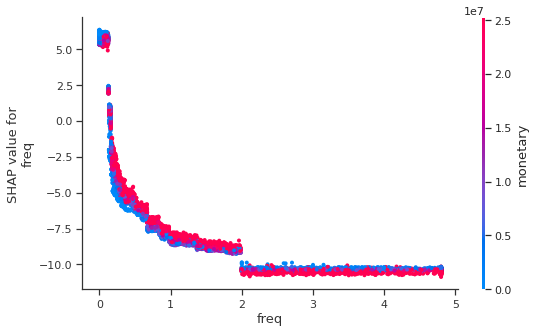

In [137]:
shap.dependence_plot('freq', shap_values, X_train)

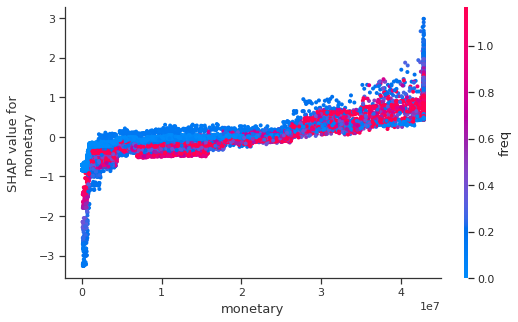

In [138]:
shap.dependence_plot('monetary', shap_values, X_train)

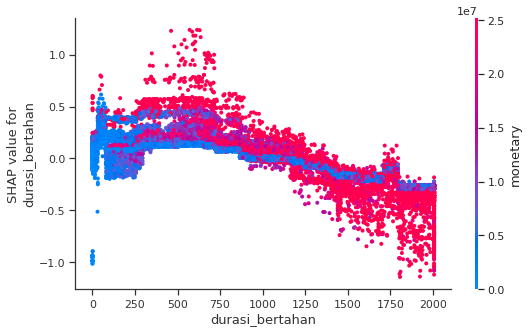

In [139]:
shap.dependence_plot('durasi_bertahan', shap_values, X_train)

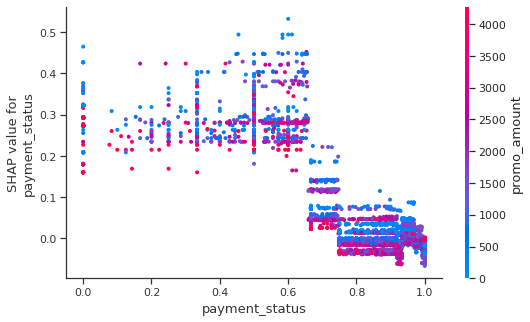

In [140]:
shap.dependence_plot('payment_status', shap_values, X_train)

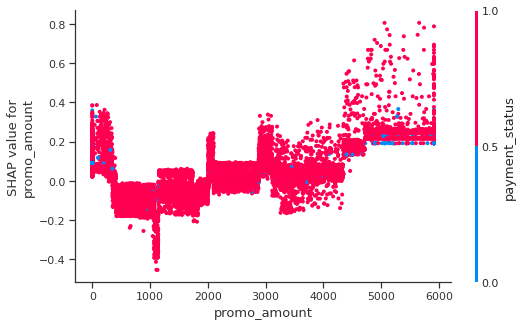

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.987 total time=   7.4s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.987 total time=   8.4s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.989 total time=   7.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=100;, score=0.988 total time=   7.7s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.988 total time=   7.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.987 total time=  10.2s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.986 total time=   9.3s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100

In [141]:
shap.dependence_plot('promo_amount', shap_values, X_train)